In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from tqdm import tqdm


C:\Users\nares\AppData\Local\Temp\ipykernel_16440\2242171942.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## CLASSIFER_C1

In [2]:
Categories1=["Benign","Grade_345"] 
flat_data_arr=[]
target_arr=[]
datadir='Dataset'
for i in Categories1: 
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in tqdm(os.listdir(path)): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(150,150,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories1.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Benign


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 93.90it/s]


loaded category:Benign successfully
loading... category : Grade_345


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 90.86it/s]

loaded category:Grade_345 successfully


In [3]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(180, 67501)

In [4]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]


In [5]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 


In [6]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
C1=GridSearchCV(svc,param_grid)


In [7]:
# Training the model using the training data 
C1.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [8]:
# Testing the model using the testing data 
y_pred = C1.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")


The model is 97.22222222222221% accurate


In [9]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['Grade_345',"Benign"]))


              precision    recall  f1-score   support

   Grade_345       1.00      0.94      0.97        16
      Benign       0.95      1.00      0.98        20

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## CLASSIFIER_C2

In [10]:
Categories2=["Grade_3","Grade_45"] 
flat_data_arr=[]
target_arr=[]
datadir='Dataset'
for i in Categories2: 
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in tqdm(os.listdir(path)): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(150,150,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories2.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Grade_3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 82.81it/s]


loaded category:Grade_3 successfully
loading... category : Grade_45


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.06it/s]

loaded category:Grade_45 successfully


In [11]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(200, 67501)

In [12]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]

In [13]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 


In [14]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
C2=GridSearchCV(svc,param_grid)

In [15]:
# Training the model using the training data 
C2.fit(x_train,y_train)



GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [16]:
# Testing the model using the testing data 
y_pred = C2.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 100.0% accurate


## CLASSIFIER_C3

In [17]:
Categories3=["Grade_4","Grade_5"] 
flat_data_arr=[]
target_arr=[]
datadir='Dataset'
for i in Categories3: 
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in tqdm(os.listdir(path)): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(150,150,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories3.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Grade_4


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 128.21it/s]


loaded category:Grade_4 successfully
loading... category : Grade_5


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 137.15it/s]

loaded category:Grade_5 successfully


In [18]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(200, 67501)

In [19]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]

In [20]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 


In [21]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
C3=GridSearchCV(svc,param_grid)

In [22]:
# Training the model using the training data 
C3.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [23]:
# Testing the model using the testing data 
y_pred = C3.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 70.0% accurate


In [24]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['Grade_5',"Grade_4"]))


              precision    recall  f1-score   support

     Grade_5       0.68      0.75      0.71        20
     Grade_4       0.72      0.65      0.68        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



## Validation

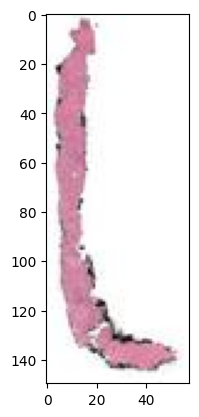

Benign = 88.33819914391083%
Grade_345 = 11.661800856089156%
The Cancer detected is : Benign


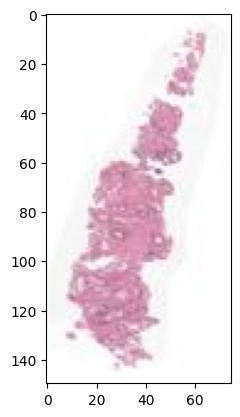

Benign = 93.89044217917687%
Grade_345 = 6.10955782082312%
The Cancer detected is : Benign


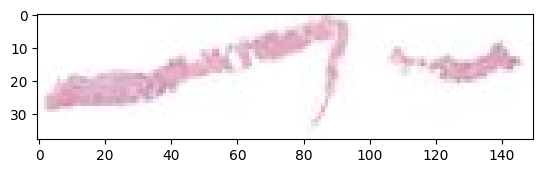

Grade_4 = 57.923717529839735%
Grade_5 = 42.076282470160265%
The Cancer detected is : Grade_4


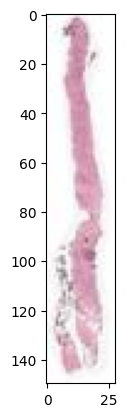

Benign = 91.31813951931967%
Grade_345 = 8.681860480680314%
The Cancer detected is : Benign


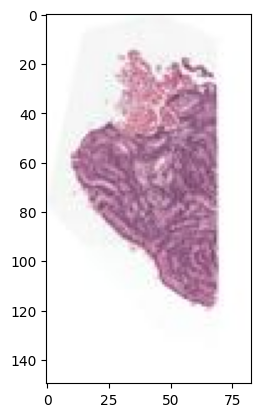

Benign = 90.73660249432943%
Grade_345 = 9.263397505670563%
The Cancer detected is : Benign


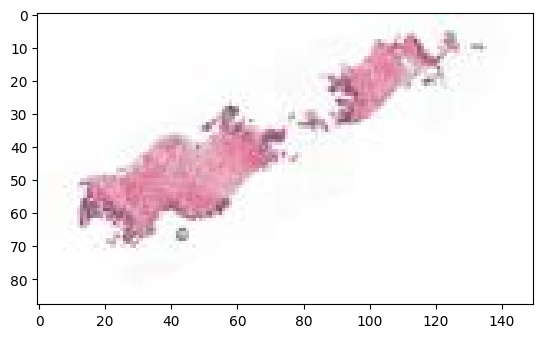

Benign = 90.38085806286254%
Grade_345 = 9.619141937137453%
The Cancer detected is : Benign


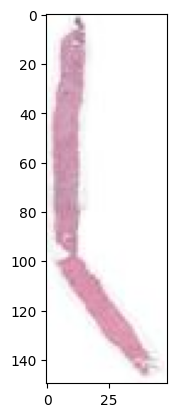

Benign = 81.15748009552374%
Grade_345 = 18.842519904476262%
The Cancer detected is : Benign


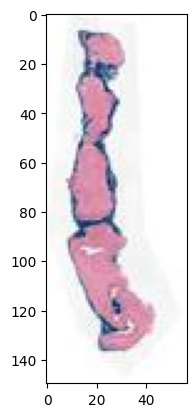

Benign = 85.89924003723648%
Grade_345 = 14.100759962763512%
The Cancer detected is : Benign


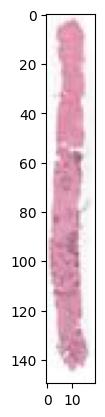

Benign = 93.61144374856781%
Grade_345 = 6.3885562514321865%
The Cancer detected is : Benign


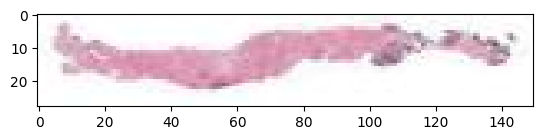

Benign = 94.53830386039506%
Grade_345 = 5.461696139604923%
The Cancer detected is : Benign


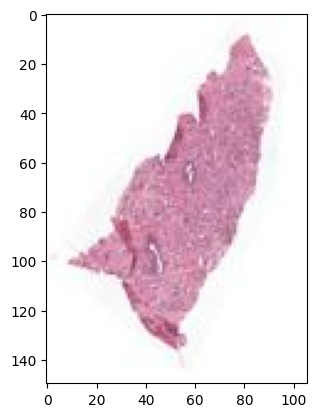

Benign = 94.22690079889365%
Grade_345 = 5.773099201106352%
The Cancer detected is : Benign


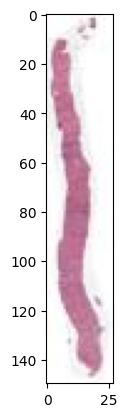

Benign = 90.06527485026491%
Grade_345 = 9.9347251497351%
The Cancer detected is : Benign


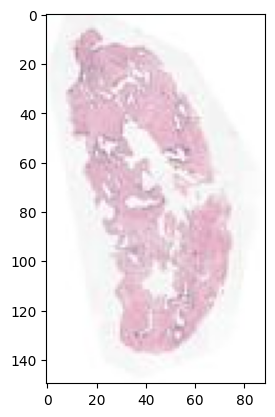

Benign = 82.55851903109%
Grade_345 = 17.44148096890998%
The Cancer detected is : Benign


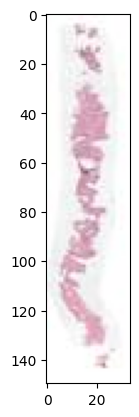

Benign = 88.97333743545491%
Grade_345 = 11.026662564545084%
The Cancer detected is : Benign


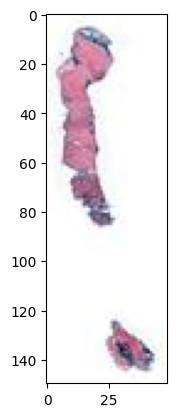

Benign = 54.947745778115674%
Grade_345 = 45.052254221884304%
The Cancer detected is : Benign


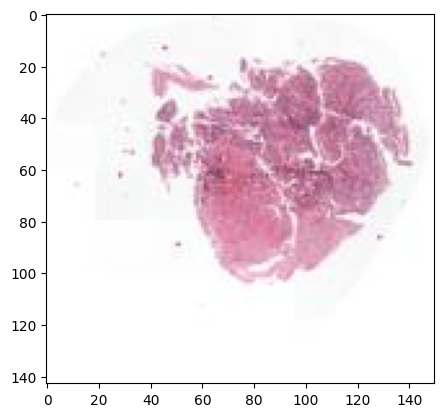

Benign = 88.68489778300095%
Grade_345 = 11.31510221699903%
The Cancer detected is : Benign


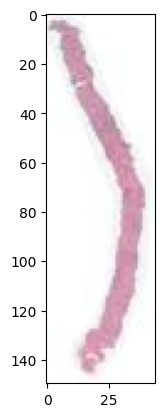

Benign = 58.32055814397245%
Grade_345 = 41.67944185602755%
The Cancer detected is : Benign


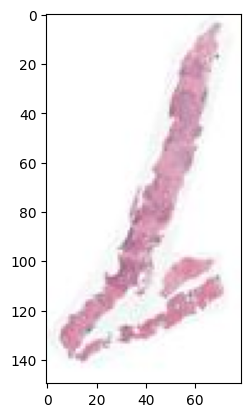

Benign = 87.39475605416264%
Grade_345 = 12.60524394583737%
The Cancer detected is : Benign


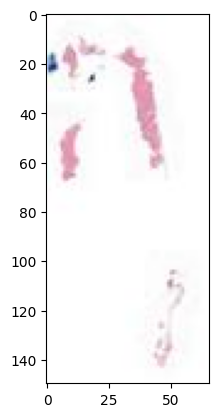

Grade_3 = 89.24780114316331%
Grade_45 = 10.752198856836669%
The Cancer detected is : Grade_3


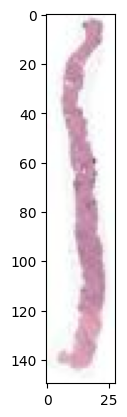

Benign = 84.10999603215484%
Grade_345 = 15.890003967845177%
The Cancer detected is : Benign


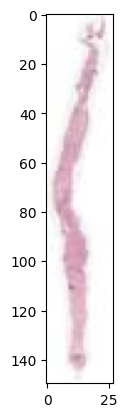

Benign = 85.92811422113371%
Grade_345 = 14.071885778866292%
The Cancer detected is : Benign


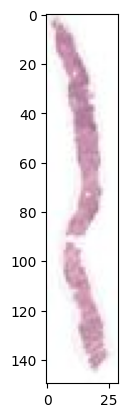

Benign = 81.26352185859044%
Grade_345 = 18.73647814140956%
The Cancer detected is : Benign


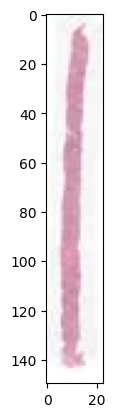

Benign = 94.43632608560176%
Grade_345 = 5.5636739143982386%
The Cancer detected is : Benign


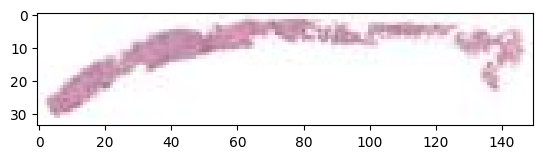

Grade_4 = 54.46453813194123%
Grade_5 = 45.53546186805877%
The Cancer detected is : Grade_4


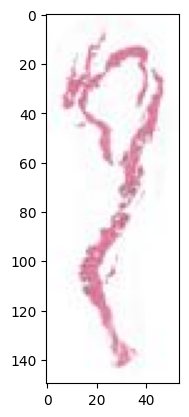

Benign = 79.01333461615063%
Grade_345 = 20.98666538384937%
The Cancer detected is : Benign


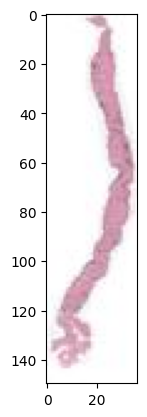

Benign = 83.38715605412975%
Grade_345 = 16.612843945870242%
The Cancer detected is : Benign


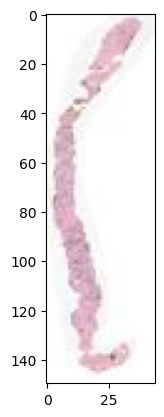

Benign = 59.86632998866808%
Grade_345 = 40.133670011331915%
The Cancer detected is : Benign


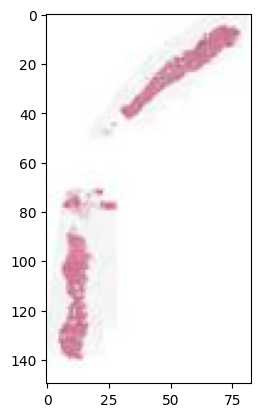

Grade_3 = 56.88282414976711%
Grade_45 = 43.11717585023286%
The Cancer detected is : Grade_3


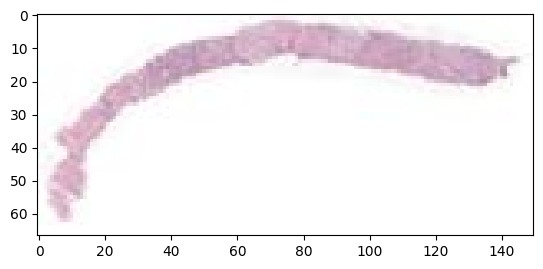

Grade_4 = 51.64297274705678%
Grade_5 = 48.357027252943205%
The Cancer detected is : Grade_4


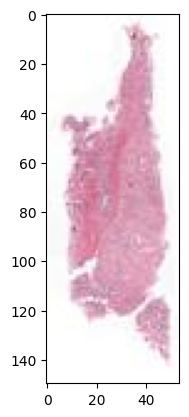

Benign = 97.73277420563451%
Grade_345 = 2.267225794365505%
The Cancer detected is : Benign


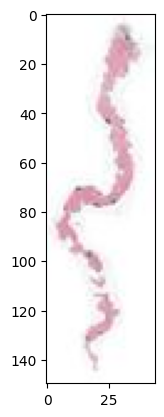

Critical Case. Attention Needed.

Benign = 50.77111574085807%
Grade_345 = 49.22888425914192%
The Cancer detected is : Benign


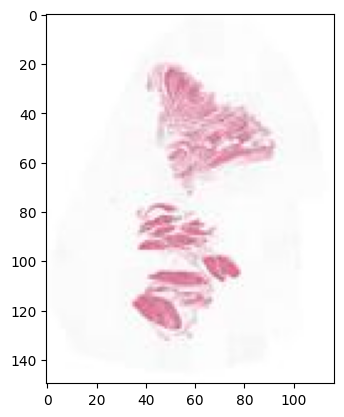

Grade_4 = 50.78805401182661%
Grade_5 = 49.21194598817337%
The Cancer detected is : Grade_4


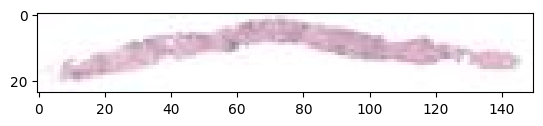

Benign = 69.13016687174988%
Grade_345 = 30.869833128250114%
The Cancer detected is : Benign


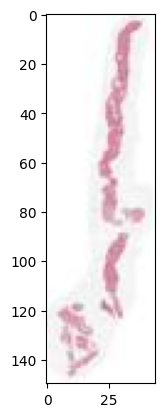

Benign = 61.82027664803403%
Grade_345 = 38.17972335196597%
The Cancer detected is : Benign


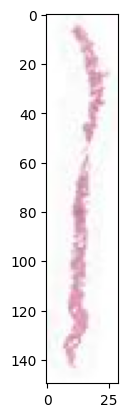

Benign = 63.26909335309746%
Grade_345 = 36.73090664690255%
The Cancer detected is : Benign


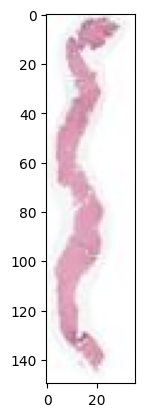

Benign = 86.47296892201489%
Grade_345 = 13.527031077985082%
The Cancer detected is : Benign


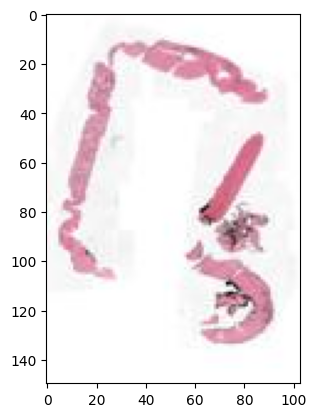

Benign = 92.18506793929146%
Grade_345 = 7.814932060708545%
The Cancer detected is : Benign


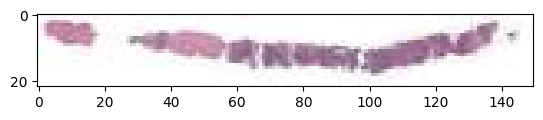

Benign = 94.36922964191375%
Grade_345 = 5.630770358086252%
The Cancer detected is : Benign


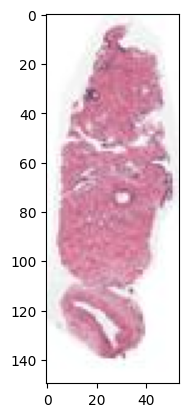

Benign = 94.02286051612653%
Grade_345 = 5.977139483873448%
The Cancer detected is : Benign


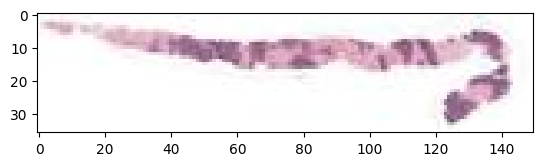

Benign = 62.74613418867027%
Grade_345 = 37.25386581132974%
The Cancer detected is : Benign


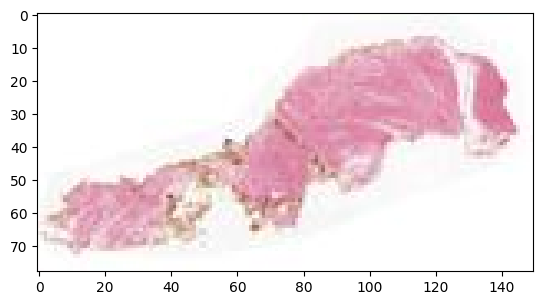

Benign = 89.39754189668035%
Grade_345 = 10.602458103319623%
The Cancer detected is : Benign


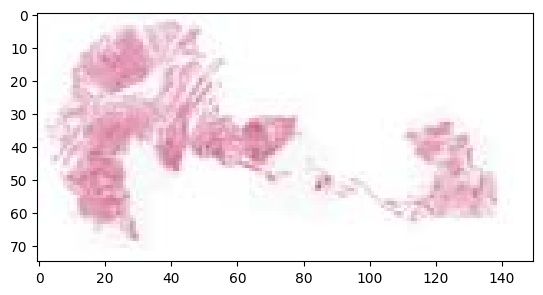

Benign = 73.73280141492566%
Grade_345 = 26.267198585074336%
The Cancer detected is : Benign


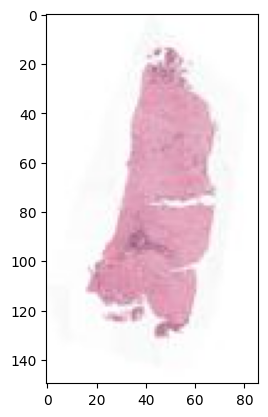

Benign = 93.83950816858507%
Grade_345 = 6.160491831414922%
The Cancer detected is : Benign


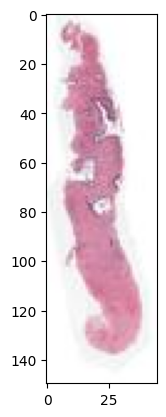

Benign = 87.6191048988026%
Grade_345 = 12.380895101197392%
The Cancer detected is : Benign


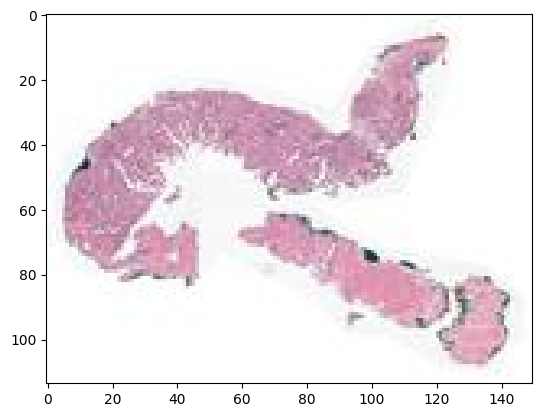

Benign = 89.26591688969117%
Grade_345 = 10.734083110308841%
The Cancer detected is : Benign


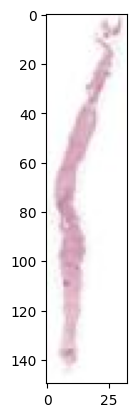

Benign = 84.6992214696111%
Grade_345 = 15.300778530388918%
The Cancer detected is : Benign


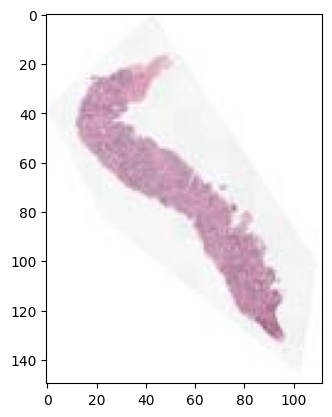

Benign = 70.62958788366763%
Grade_345 = 29.37041211633237%
The Cancer detected is : Benign


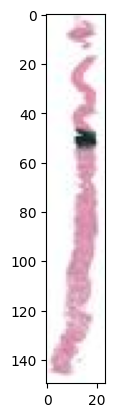

Benign = 89.4206378545782%
Grade_345 = 10.579362145421777%
The Cancer detected is : Benign


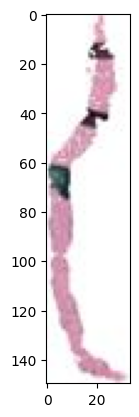

Benign = 85.64921394553477%
Grade_345 = 14.350786054465239%
The Cancer detected is : Benign


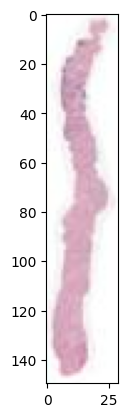

Benign = 93.6070999040614%
Grade_345 = 6.392900095938614%
The Cancer detected is : Benign


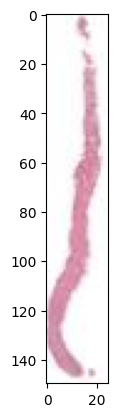

Benign = 88.89932597603264%
Grade_345 = 11.100674023967342%
The Cancer detected is : Benign


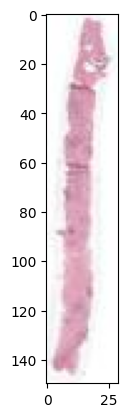

Benign = 95.17583790263764%
Grade_345 = 4.824162097362352%
The Cancer detected is : Benign


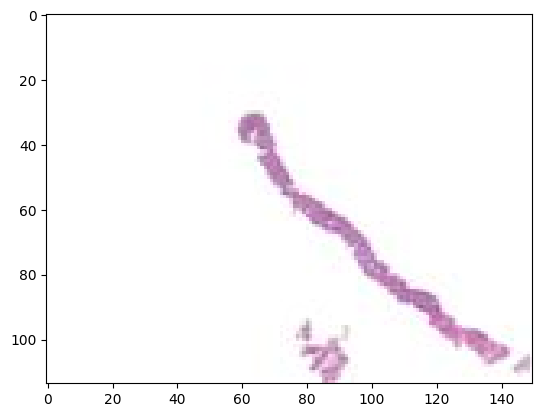

Grade_3 = 96.24250696531534%
Grade_45 = 3.7574930346846496%
The Cancer detected is : Grade_3


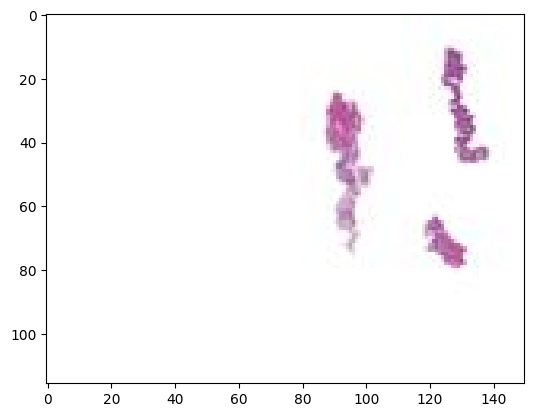

Grade_3 = 96.79903804214139%
Grade_45 = 3.2009619578585973%
The Cancer detected is : Grade_3


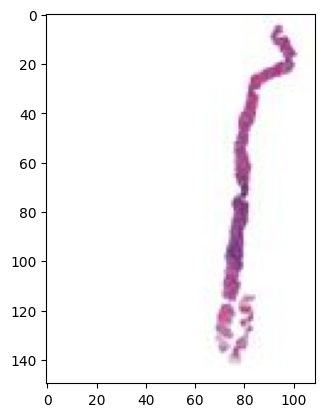

Grade_3 = 83.95510041503589%
Grade_45 = 16.044899584964124%
The Cancer detected is : Grade_3


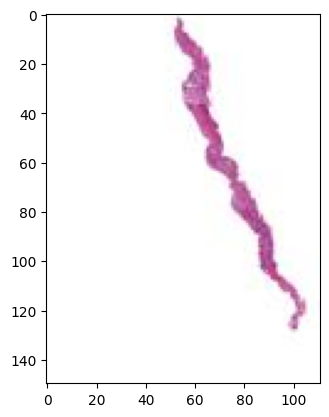

Grade_3 = 93.97964794845943%
Grade_45 = 6.020352051540562%
The Cancer detected is : Grade_3


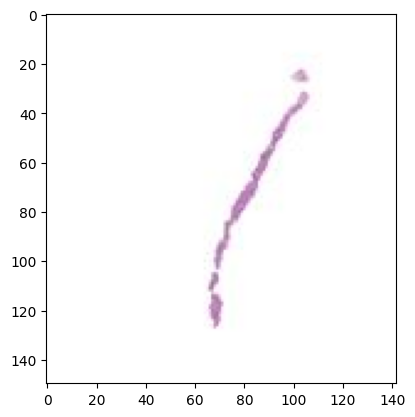

Grade_3 = 99.4301277808851%
Grade_45 = 0.5698722191148922%
The Cancer detected is : Grade_3


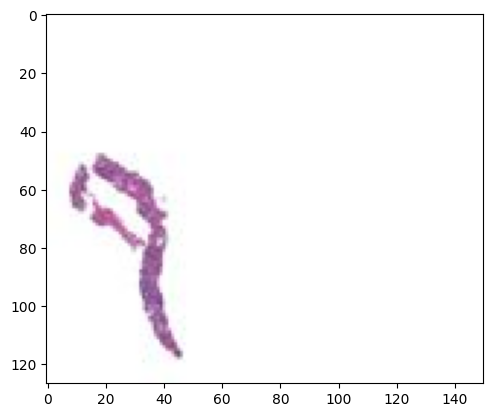

Grade_3 = 98.00402847041185%
Grade_45 = 1.9959715295881506%
The Cancer detected is : Grade_3


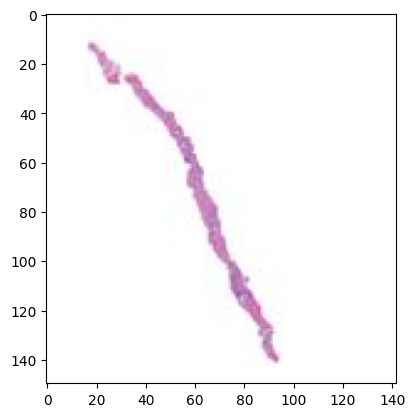

Grade_3 = 98.28060988978586%
Grade_45 = 1.7193901102141245%
The Cancer detected is : Grade_3


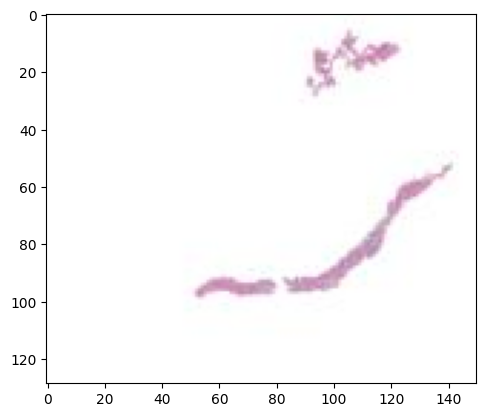

Grade_3 = 99.05656719678657%
Grade_45 = 0.94343280321343%
The Cancer detected is : Grade_3


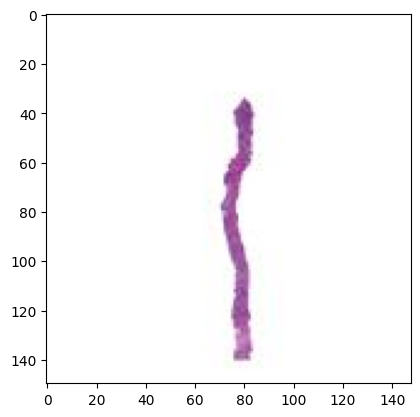

Grade_3 = 98.45907317568101%
Grade_45 = 1.5409268243189884%
The Cancer detected is : Grade_3


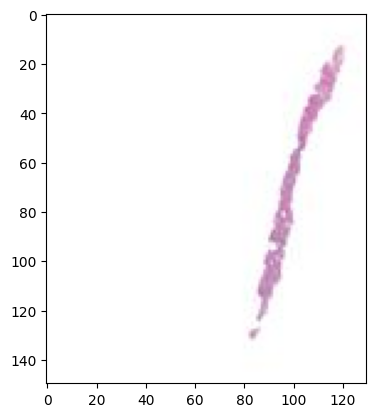

Grade_3 = 99.40172956969899%
Grade_45 = 0.5982704303010304%
The Cancer detected is : Grade_3


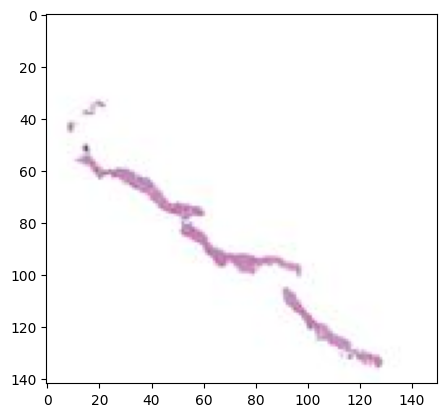

Grade_3 = 99.06983780906629%
Grade_45 = 0.9301621909337249%
The Cancer detected is : Grade_3


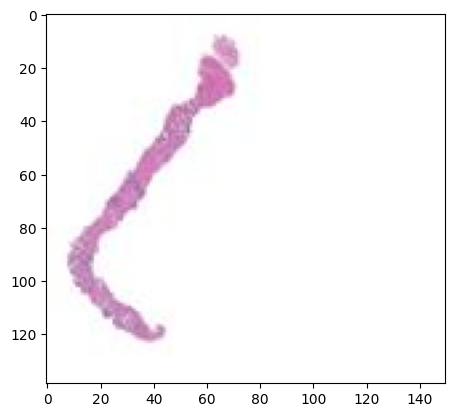

Grade_3 = 94.17243727270241%
Grade_45 = 5.827562727297575%
The Cancer detected is : Grade_3


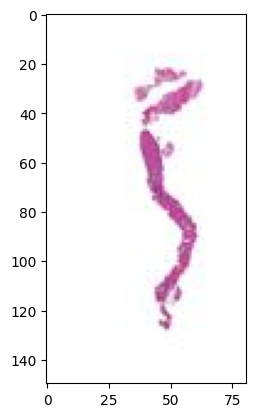

Grade_3 = 50.0%
Grade_45 = 50.0%
The Cancer detected is : Grade_3


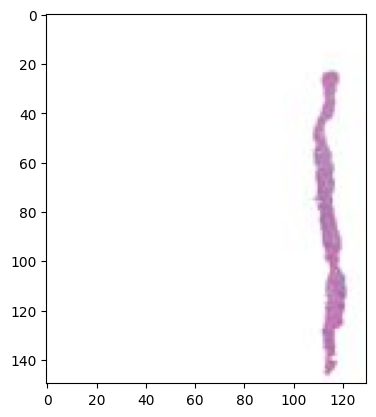

Grade_3 = 98.81379850367888%
Grade_45 = 1.1862014963211038%
The Cancer detected is : Grade_3


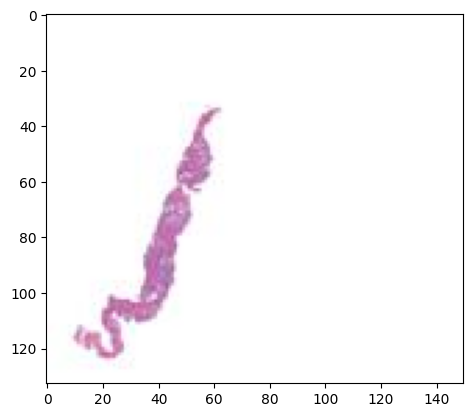

Grade_3 = 95.88256086885445%
Grade_45 = 4.117439131145541%
The Cancer detected is : Grade_3


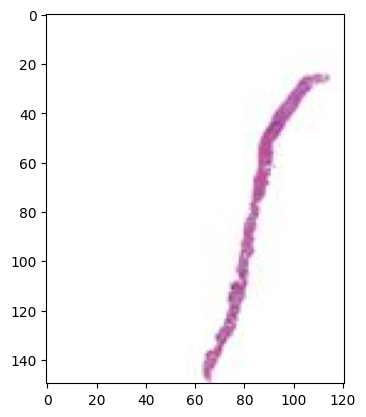

Grade_3 = 96.98550294599066%
Grade_45 = 3.0144970540093383%
The Cancer detected is : Grade_3


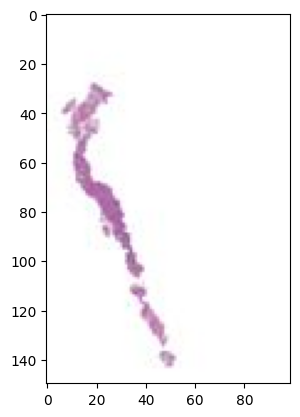

Grade_3 = 96.14080826042793%
Grade_45 = 3.859191739572075%
The Cancer detected is : Grade_3


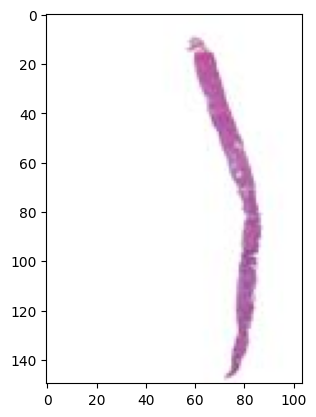

Grade_3 = 76.556637593885%
Grade_45 = 23.44336240611499%
The Cancer detected is : Grade_3


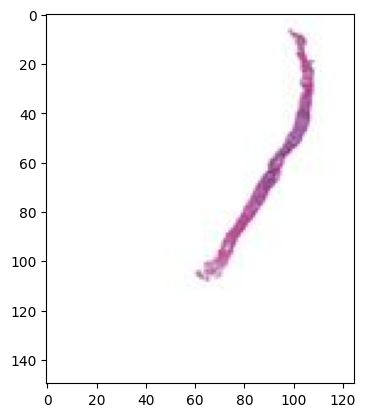

Grade_3 = 98.71769935743491%
Grade_45 = 1.2823006425650854%
The Cancer detected is : Grade_3


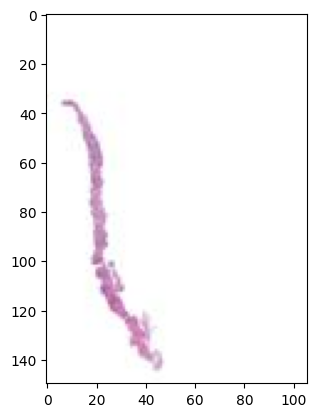

Grade_3 = 98.70644349915227%
Grade_45 = 1.2935565008477259%
The Cancer detected is : Grade_3


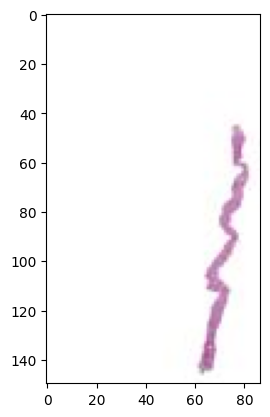

Grade_3 = 98.6469054477571%
Grade_45 = 1.3530945522429023%
The Cancer detected is : Grade_3


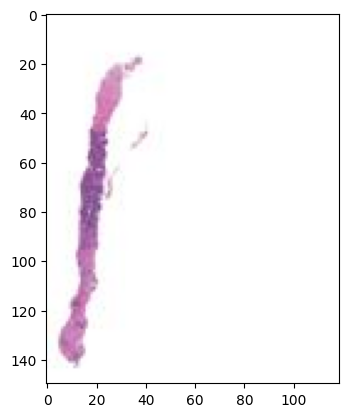

Grade_3 = 96.59947083604865%
Grade_45 = 3.4005291639513353%
The Cancer detected is : Grade_3


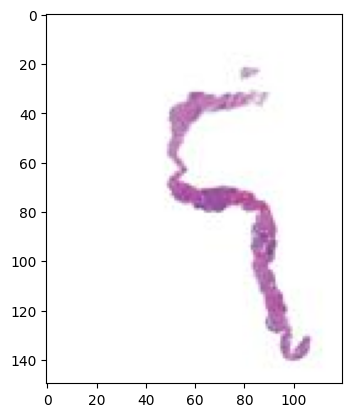

Grade_3 = 73.20945783142743%
Grade_45 = 26.79054216857256%
The Cancer detected is : Grade_3


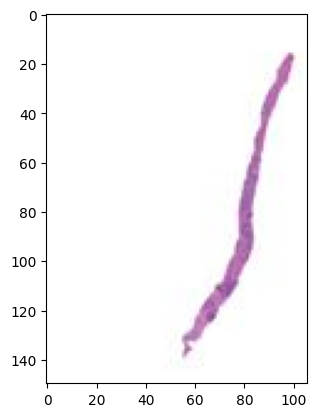

Grade_3 = 97.71977463970588%
Grade_45 = 2.280225360294142%
The Cancer detected is : Grade_3


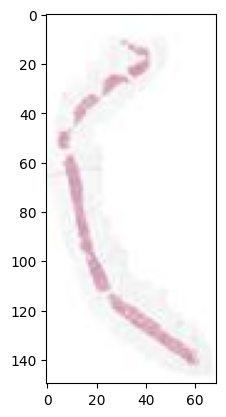

Grade_3 = 80.22719075876506%
Grade_45 = 19.772809241234942%
The Cancer detected is : Grade_3


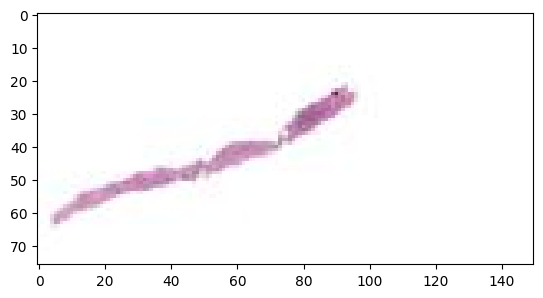

Grade_3 = 92.72015851778434%
Grade_45 = 7.27984148221566%
The Cancer detected is : Grade_3


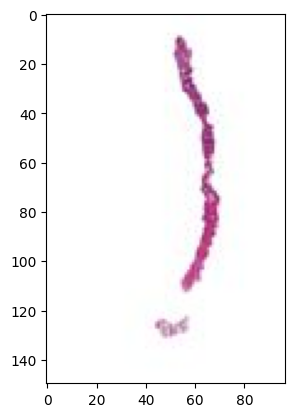

Grade_3 = 92.8530132993522%
Grade_45 = 7.146986700647778%
The Cancer detected is : Grade_3


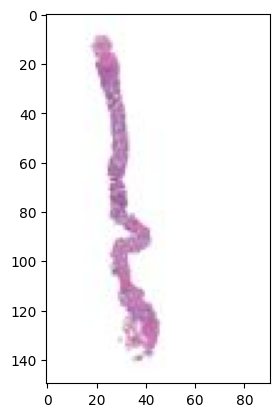

Grade_3 = 49.43959334884364%
Grade_45 = 50.560406651156356%
The Cancer detected is : Grade_3


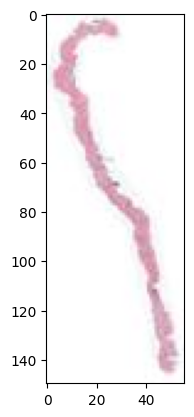

Grade_3 = 50.52992531524012%
Grade_45 = 49.47007468475988%
The Cancer detected is : Grade_3


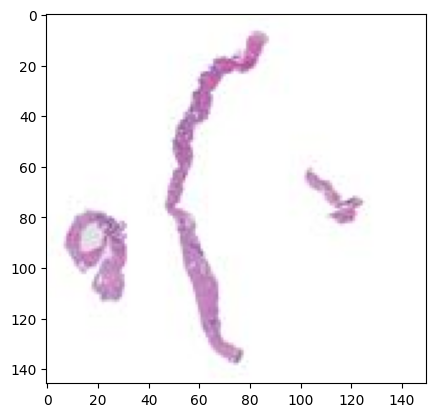

Grade_3 = 65.95517499589224%
Grade_45 = 34.04482500410778%
The Cancer detected is : Grade_3


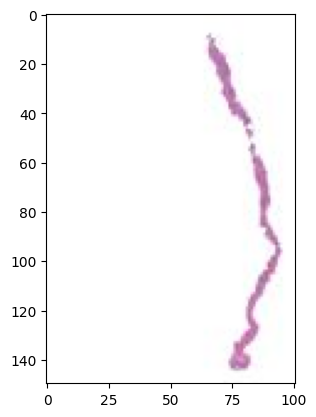

Grade_3 = 98.50029999109985%
Grade_45 = 1.4997000089001475%
The Cancer detected is : Grade_3


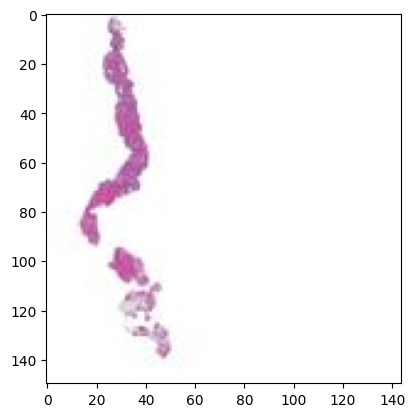

Grade_3 = 94.72211195427317%
Grade_45 = 5.277888045726823%
The Cancer detected is : Grade_3


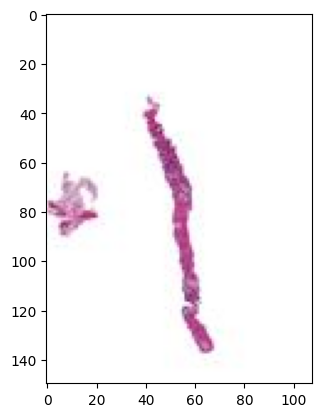

Grade_3 = 86.21147090080227%
Grade_45 = 13.788529099197733%
The Cancer detected is : Grade_3


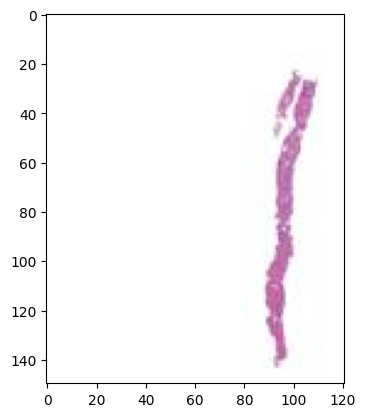

Grade_3 = 97.84409239777654%
Grade_45 = 2.1559076022234582%
The Cancer detected is : Grade_3


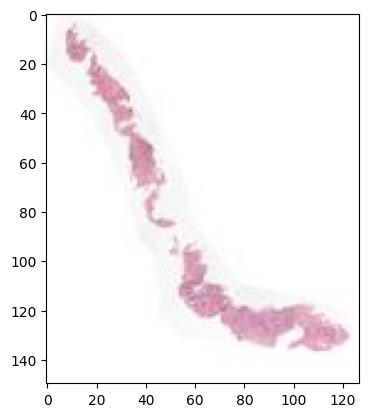

Grade_3 = 81.38376281743723%
Grade_45 = 18.616237182562767%
The Cancer detected is : Grade_3


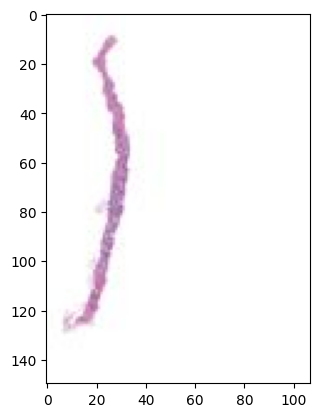

Grade_3 = 98.15261073409218%
Grade_45 = 1.8473892659078384%
The Cancer detected is : Grade_3


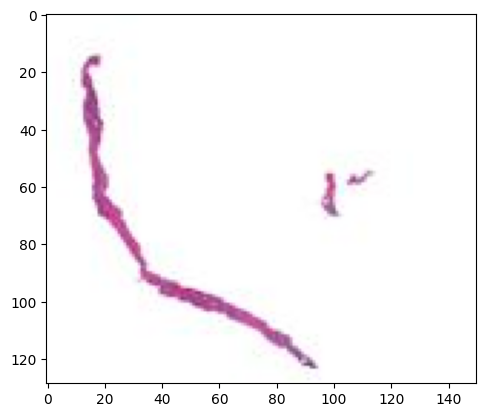

Grade_3 = 96.15836264702017%
Grade_45 = 3.8416373529798347%
The Cancer detected is : Grade_3


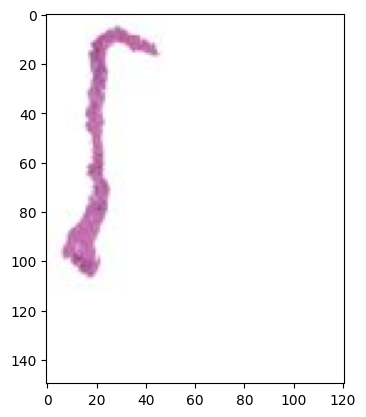

Grade_3 = 97.24440259122899%
Grade_45 = 2.7555974087710084%
The Cancer detected is : Grade_3


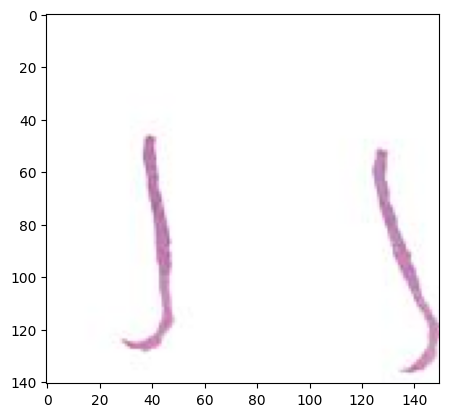

Grade_3 = 98.28489840593485%
Grade_45 = 1.7151015940651577%
The Cancer detected is : Grade_3


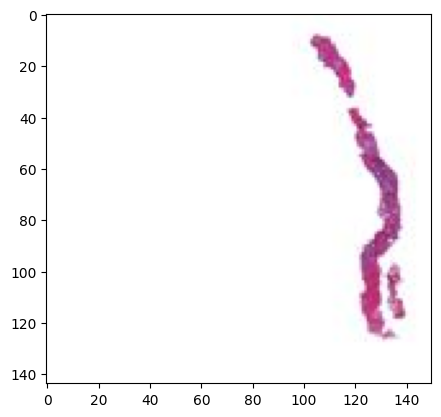

Grade_3 = 93.88035485593164%
Grade_45 = 6.119645144068354%
The Cancer detected is : Grade_3


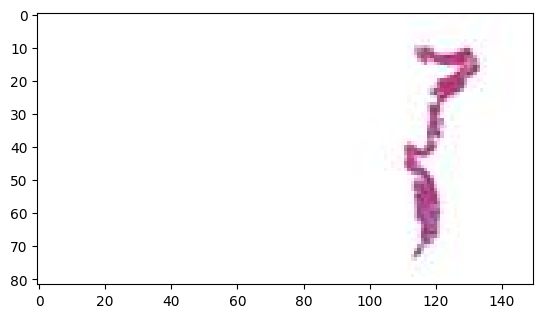

Grade_3 = 98.39370062823176%
Grade_45 = 1.6062993717682514%
The Cancer detected is : Grade_3


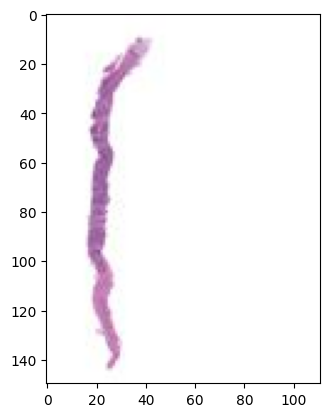

Grade_3 = 95.0583575877783%
Grade_45 = 4.941642412221703%
The Cancer detected is : Grade_3


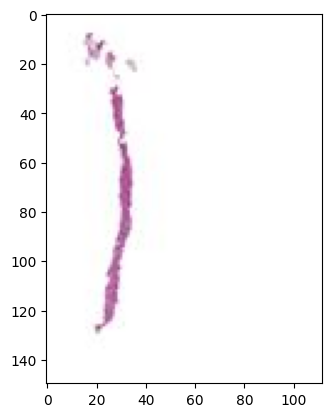

Grade_3 = 98.65555902620582%
Grade_45 = 1.3444409737941756%
The Cancer detected is : Grade_3


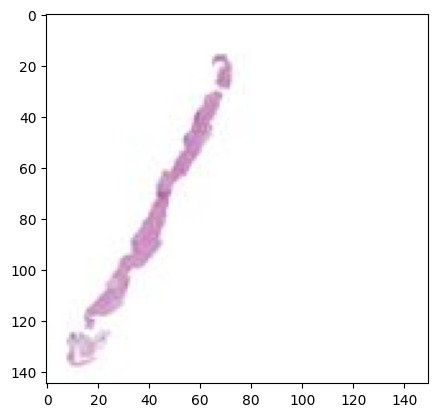

Grade_3 = 97.14689610286615%
Grade_45 = 2.853103897133844%
The Cancer detected is : Grade_3


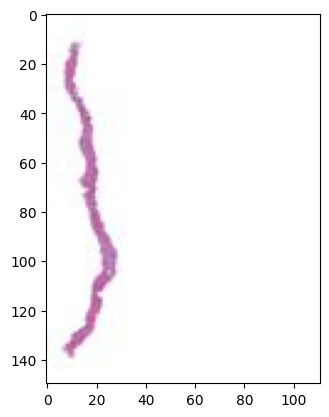

Grade_3 = 98.56043591612277%
Grade_45 = 1.4395640838772303%
The Cancer detected is : Grade_3


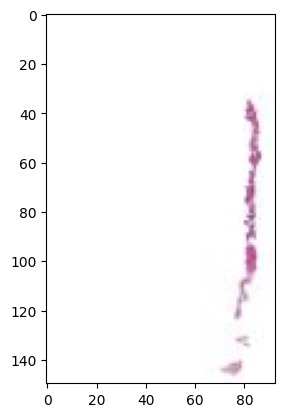

Grade_3 = 99.53492765441807%
Grade_45 = 0.46507234558192573%
The Cancer detected is : Grade_3


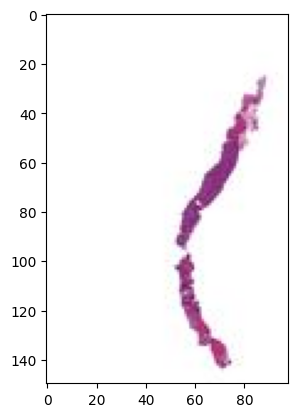

Grade_3 = 74.7824441701003%
Grade_45 = 25.217555829899663%
The Cancer detected is : Grade_3


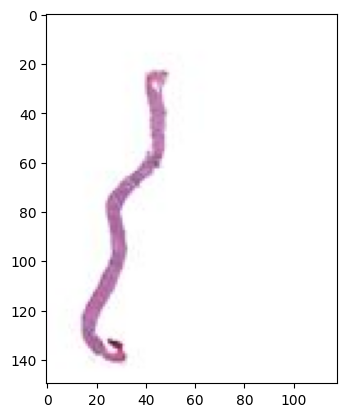

Grade_3 = 91.81132799598305%
Grade_45 = 8.188672004016945%
The Cancer detected is : Grade_3


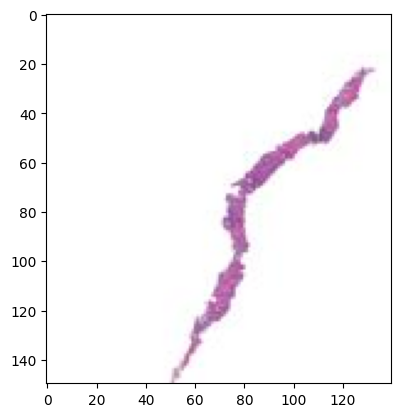

Grade_3 = 94.26089082102808%
Grade_45 = 5.739109178971905%
The Cancer detected is : Grade_3


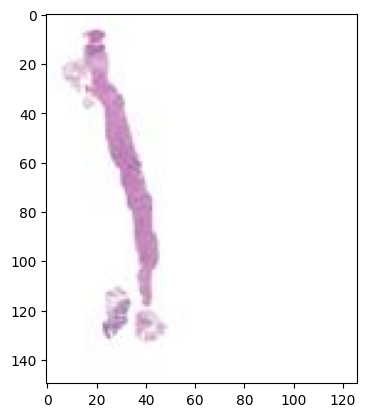

Grade_3 = 93.72965758099944%
Grade_45 = 6.270342419000549%
The Cancer detected is : Grade_3


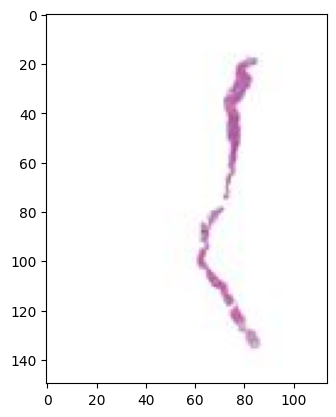

Grade_3 = 98.22909483868779%
Grade_45 = 1.770905161312212%
The Cancer detected is : Grade_3


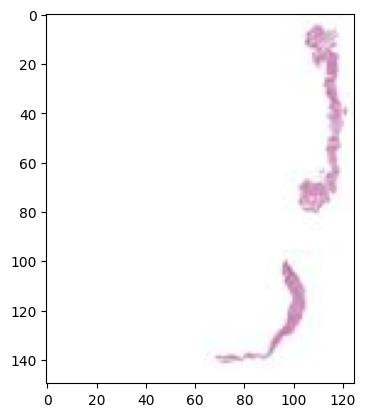

Grade_3 = 99.06984159762318%
Grade_45 = 0.9301584023768324%
The Cancer detected is : Grade_3


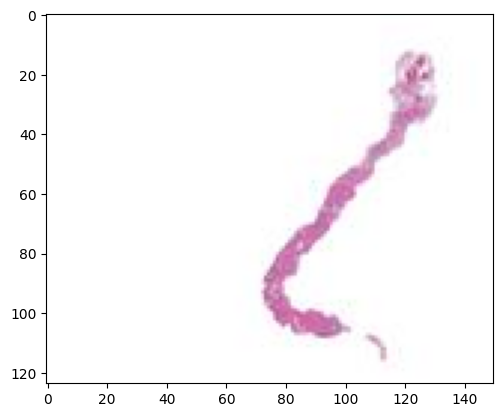

Grade_3 = 96.3360065043839%
Grade_45 = 3.663993495616105%
The Cancer detected is : Grade_3


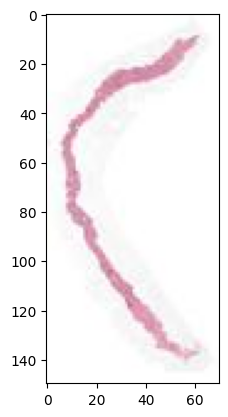

Grade_4 = 55.16978429744388%
Grade_5 = 44.83021570255611%
The Cancer detected is : Grade_4


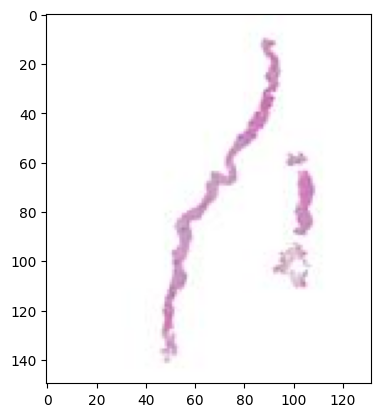

Grade_3 = 95.3915806551545%
Grade_45 = 4.608419344845515%
The Cancer detected is : Grade_3


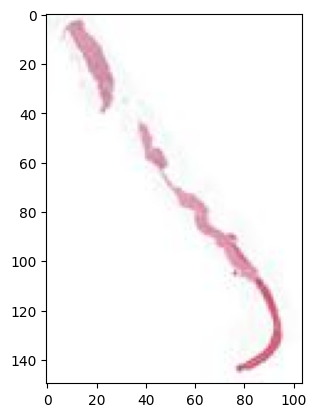

Grade_3 = 94.8777111682783%
Grade_45 = 5.122288831721708%
The Cancer detected is : Grade_3


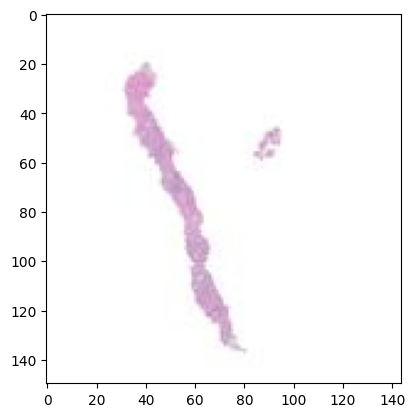

Grade_3 = 97.36007281606693%
Grade_45 = 2.6399271839330702%
The Cancer detected is : Grade_3


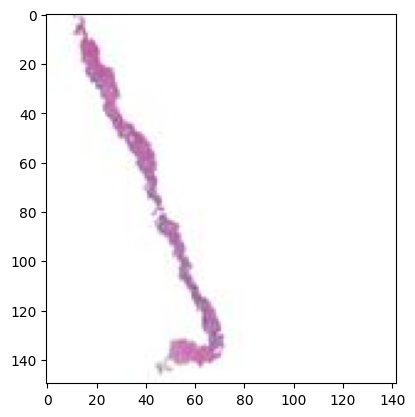

Grade_3 = 94.45334045206926%
Grade_45 = 5.546659547930745%
The Cancer detected is : Grade_3


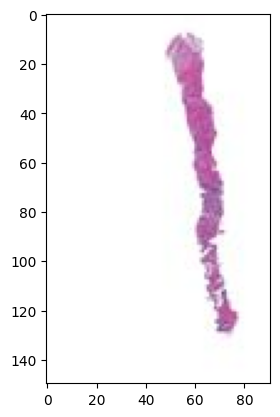

Grade_3 = 54.41857575082124%
Grade_45 = 45.58142424917877%
The Cancer detected is : Grade_3


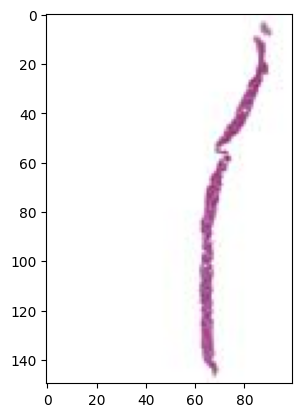

Grade_3 = 90.9308234646873%
Grade_45 = 9.069176535312698%
The Cancer detected is : Grade_3


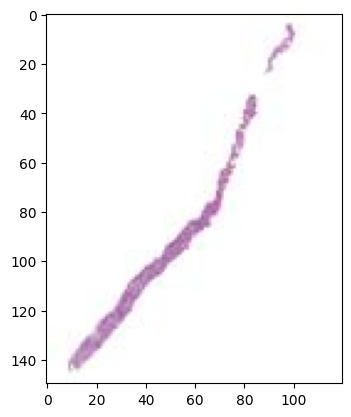

Grade_3 = 95.61806207325192%
Grade_45 = 4.3819379267480745%
The Cancer detected is : Grade_3


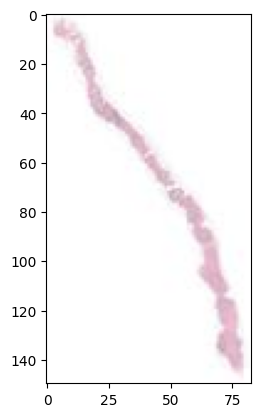

Grade_3 = 98.31889410354277%
Grade_45 = 1.6811058964572283%
The Cancer detected is : Grade_3


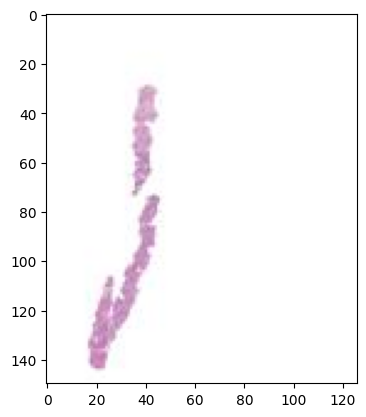

Grade_3 = 98.69239616502436%
Grade_45 = 1.3076038349756436%
The Cancer detected is : Grade_3


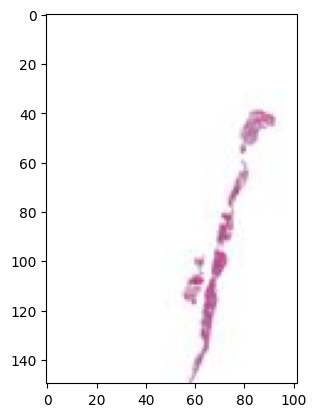

Grade_3 = 98.85893132833539%
Grade_45 = 1.1410686716646175%
The Cancer detected is : Grade_3


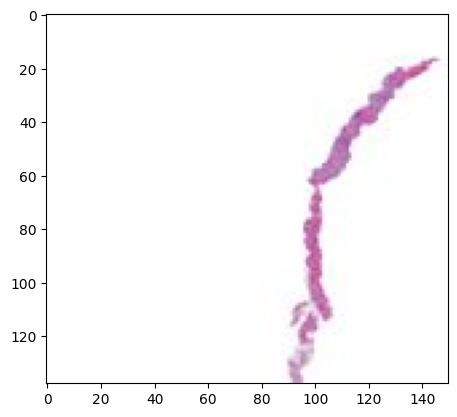

Grade_3 = 97.61663834085863%
Grade_45 = 2.383361659141371%
The Cancer detected is : Grade_3


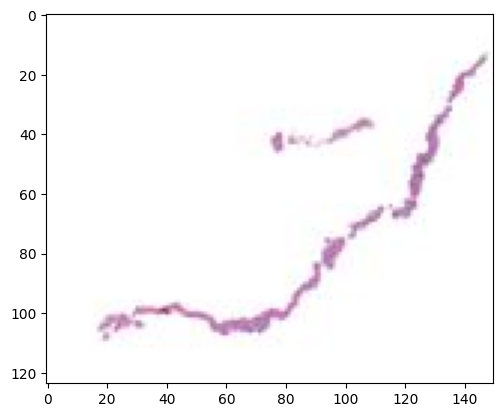

Grade_3 = 97.91890402306099%
Grade_45 = 2.0810959769390025%
The Cancer detected is : Grade_3


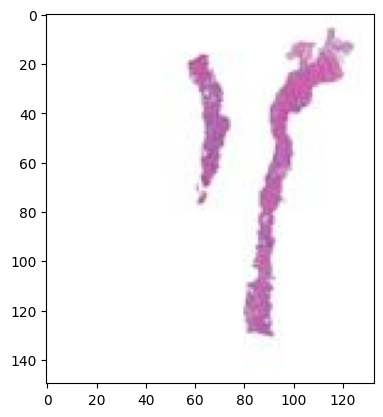

Grade_4 = 47.12747785112186%
Grade_5 = 52.872522148878154%
The Cancer detected is : Grade_5


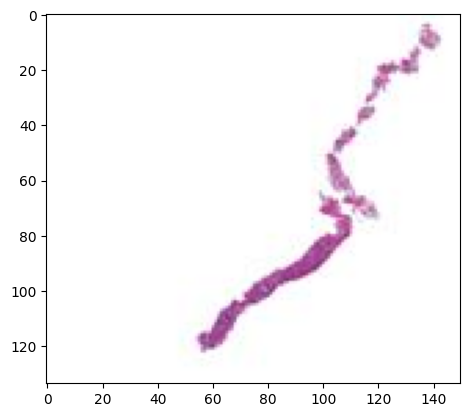

Grade_3 = 96.9895479006784%
Grade_45 = 3.010452099321593%
The Cancer detected is : Grade_3


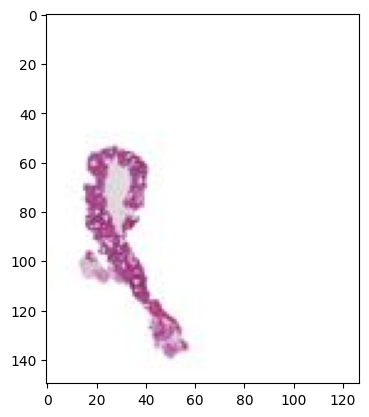

Grade_3 = 80.62832370842304%
Grade_45 = 19.37167629157694%
The Cancer detected is : Grade_3


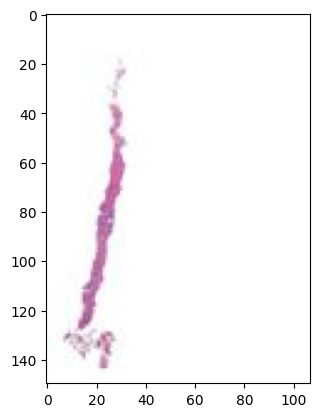

Grade_3 = 98.02341643426114%
Grade_45 = 1.9765835657388633%
The Cancer detected is : Grade_3


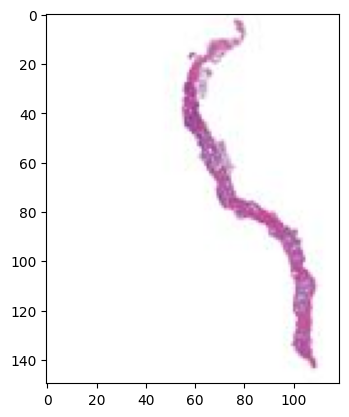

Grade_3 = 90.21074772155376%
Grade_45 = 9.78925227844625%
The Cancer detected is : Grade_3


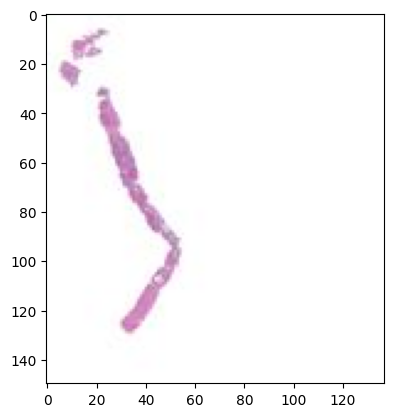

Grade_3 = 98.45290139958094%
Grade_45 = 1.547098600419063%
The Cancer detected is : Grade_3


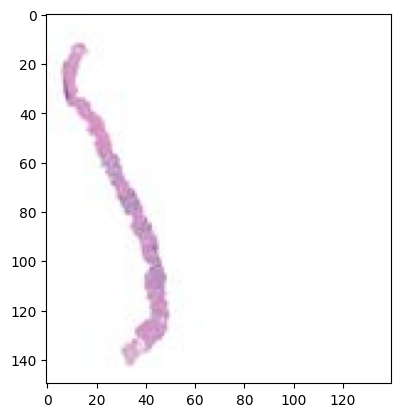

Grade_3 = 98.57538952811214%
Grade_45 = 1.4246104718878592%
The Cancer detected is : Grade_3


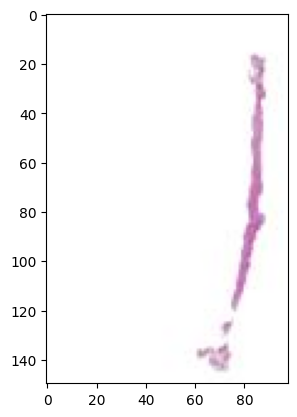

Grade_3 = 98.70972504138851%
Grade_45 = 1.2902749586114994%
The Cancer detected is : Grade_3


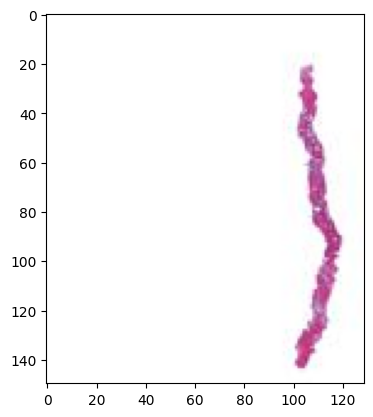

Grade_3 = 96.80015997768868%
Grade_45 = 3.1998400223113115%
The Cancer detected is : Grade_3


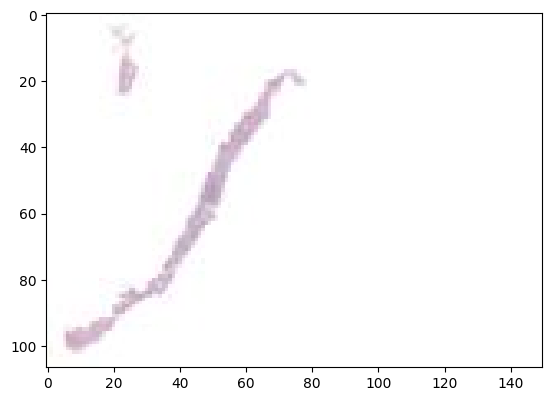

Grade_3 = 98.99322134286443%
Grade_45 = 1.006778657135565%
The Cancer detected is : Grade_3


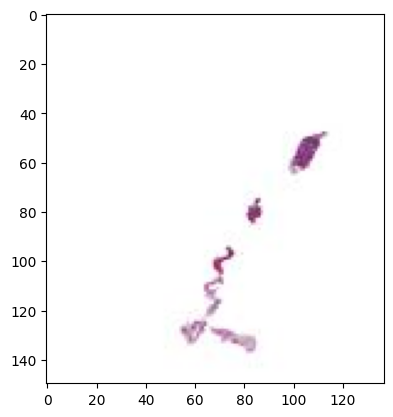

Grade_3 = 99.44483202185934%
Grade_45 = 0.5551679781406489%
The Cancer detected is : Grade_3


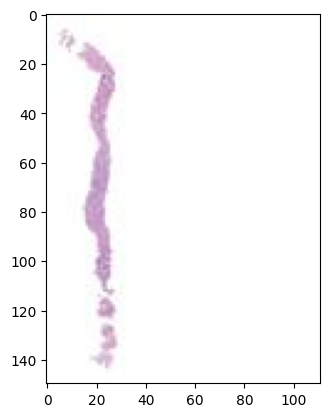

Grade_3 = 99.03873264486124%
Grade_45 = 0.9612673551387646%
The Cancer detected is : Grade_3


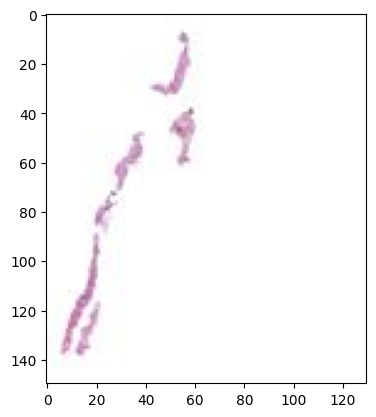

Grade_3 = 99.0277721896194%
Grade_45 = 0.9722278103806126%
The Cancer detected is : Grade_3


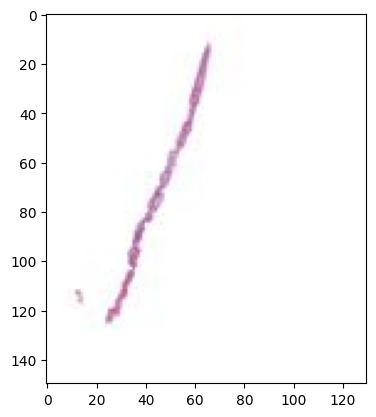

Grade_3 = 99.1836179828567%
Grade_45 = 0.8163820171433048%
The Cancer detected is : Grade_3


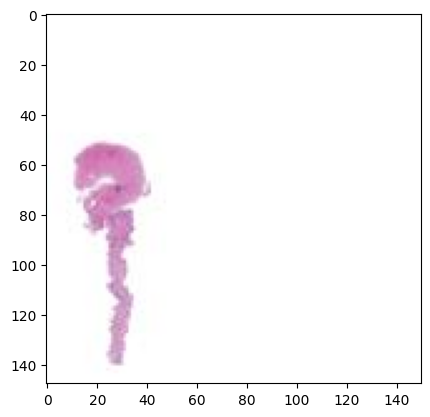

Grade_3 = 98.8088172398548%
Grade_45 = 1.1911827601451896%
The Cancer detected is : Grade_3


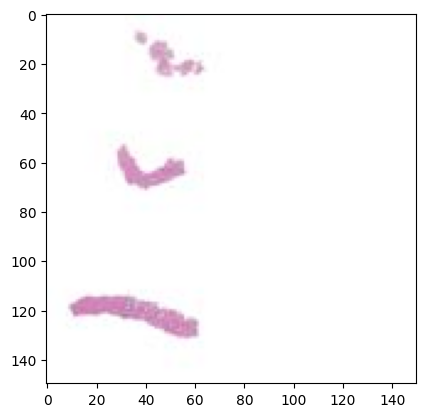

Grade_3 = 98.72885326458928%
Grade_45 = 1.2711467354107162%
The Cancer detected is : Grade_3


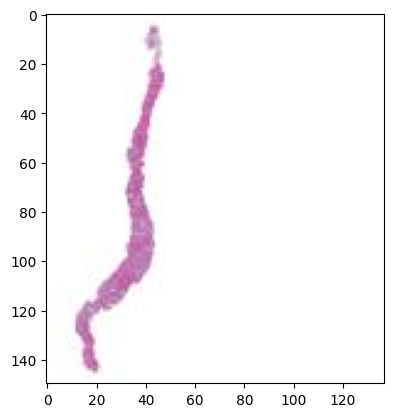

Grade_3 = 96.61889416853597%
Grade_45 = 3.3811058314640388%
The Cancer detected is : Grade_3


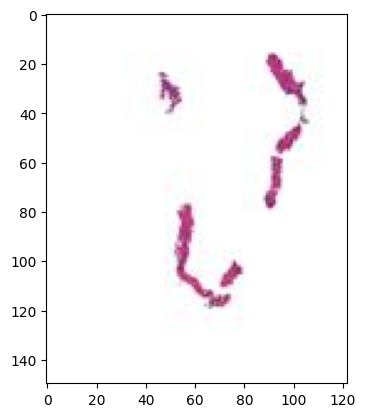

Grade_3 = 93.17160973669452%
Grade_45 = 6.828390263305489%
The Cancer detected is : Grade_3


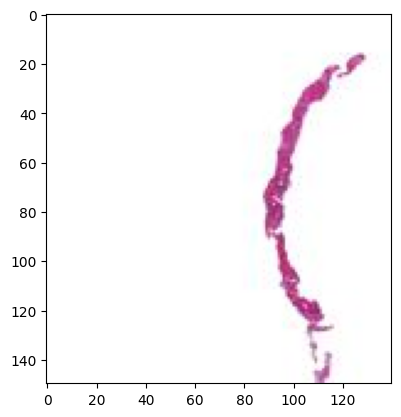

Grade_3 = 91.17407006282939%
Grade_45 = 8.825929937170613%
The Cancer detected is : Grade_3


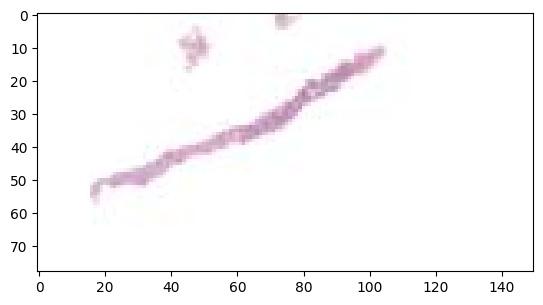

Grade_3 = 97.7026218169595%
Grade_45 = 2.297378183040483%
The Cancer detected is : Grade_3


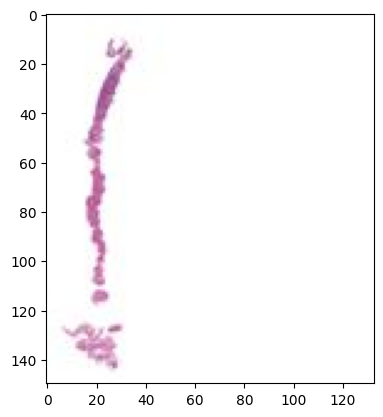

Grade_3 = 99.09585820852791%
Grade_45 = 0.904141791472083%
The Cancer detected is : Grade_3


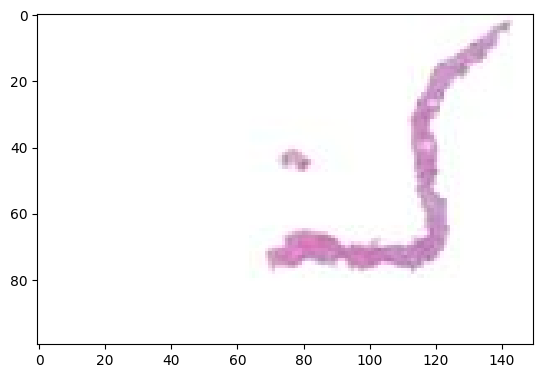

Grade_3 = 98.13445799321904%
Grade_45 = 1.8655420067809731%
The Cancer detected is : Grade_3


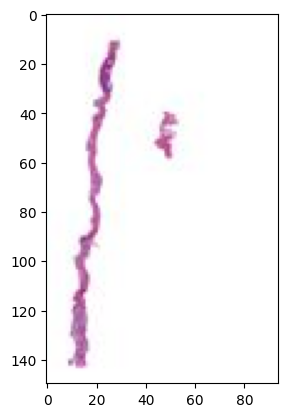

Grade_3 = 95.07645031796157%
Grade_45 = 4.923549682038428%
The Cancer detected is : Grade_3


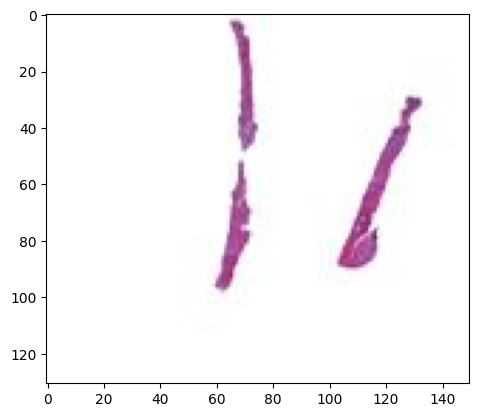

Grade_3 = 88.19104484516258%
Grade_45 = 11.808955154837408%
The Cancer detected is : Grade_3


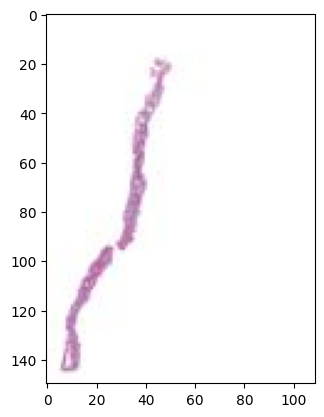

Grade_3 = 97.04905634851131%
Grade_45 = 2.950943651488703%
The Cancer detected is : Grade_3


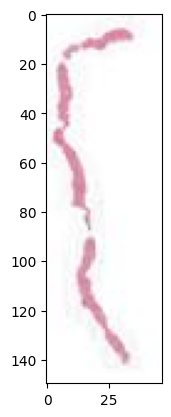

Grade_4 = 55.12384301590883%
Grade_5 = 44.876156984091175%
The Cancer detected is : Grade_4


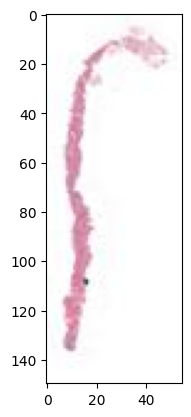

Grade_3 = 61.36284131116629%
Grade_45 = 38.6371586888337%
The Cancer detected is : Grade_3


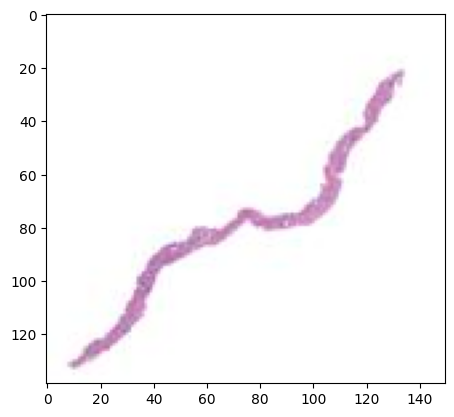

Grade_3 = 96.13703067430198%
Grade_45 = 3.8629693256980167%
The Cancer detected is : Grade_3


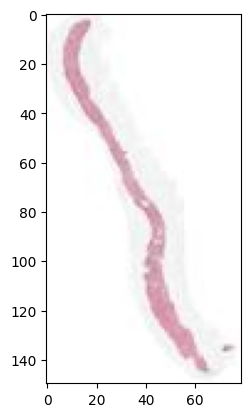

Grade_3 = 56.461692292133556%
Grade_45 = 43.53830770786642%
The Cancer detected is : Grade_3


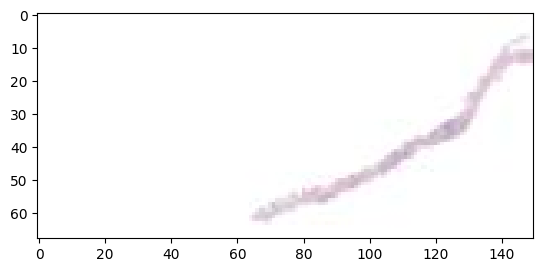

Grade_3 = 99.57576061122992%
Grade_45 = 0.4242393887700655%
The Cancer detected is : Grade_3


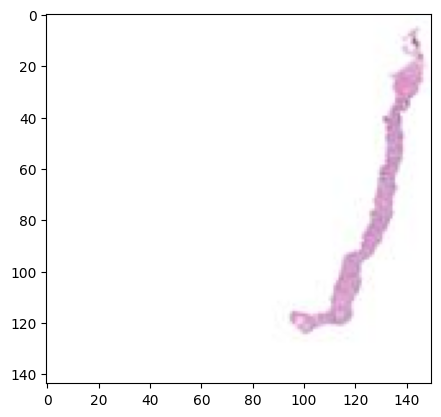

Grade_3 = 99.26177680237616%
Grade_45 = 0.7382231976238383%
The Cancer detected is : Grade_3


In [27]:
for i in range(1,150):
    path="C:/Users/nares/Jupyter Notebook/Naresh/Final project/Dataset/Testing/" 
    path=path+'Testing.%d.jpg'%i
    img=imread(path) 
    plt.imshow(img) 
    plt.show() 
    img_resize=resize(img,(150,150,3)) 
    l=[img_resize.flatten()] 
    probability=C1.predict_proba(l) 
    predicted=Categories1[C1.predict(l)[0]]
    if predicted=="Benign":
        if 0.48<=probability[0][1]<=0.52:
            print("Critical Case. Attention Needed.\n")
        for ind,val in enumerate(Categories1): 
        	print(f'{val} = {probability[0][ind]*100}%') 
        print("The Cancer detected is : "+predicted)
    else:
        probability=C2.predict_proba(l) 
        predicted=Categories2[C2.predict(l)[0]]
        if predicted=="Grade_3":
            for ind,val in enumerate(Categories2): 
            	print(f'{val} = {probability[0][ind]*100}%') 
            print("The Cancer detected is : "+predicted)
        else:
            probability=C3.predict_proba(l) 
            for ind,val in enumerate(Categories3): 
            	print(f'{val} = {probability[0][ind]*100}%') 
            print("The Cancer detected is : "+Categories3[C3.predict(l)[0]])
            
        